##Un Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [4]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [5]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [6]:
gdp_df['Value Footnotes'].isna().count()

7662

In [7]:
gdp_df.columns.drop('Value Footnotes')

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [8]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [9]:
del gdp_df['Value Footnotes']

In [10]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [11]:
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [12]:
gdp_df.shape
#There are 7662 rows and 3 columns

(7662, 3)

In [13]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


I do not see any different type as gdp is float, name is string object and year is integer.

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [14]:
#unique 
gdp_df['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [15]:
#number of observations per year
gdp_df['Year'].value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

There are average more than 200 observations per year

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [16]:
#count of unique countries.
gdp_df['Country'].nunique()

242

There are total 242 unique countries in the dataset.

In [17]:
gdp_df.groupby('Country')['Country'].count().nsmallest(50)
#see which countries are least represented by taking n smallest from the count

Country
Djibouti                       10
Somalia                        10
Turks and Caicos Islands       12
Sint Maarten (Dutch part)      14
Kosovo                         15
Cayman Islands                 16
Nauru                          19
Afghanistan                    20
CuraÃ§ao                       22
Palau                          22
SÃ£o TomÃ© and Principe        22
Liberia                        23
Other small states             23
Qatar                          23
Timor-Leste                    23
Libya                          24
San Marino                     25
Montenegro                     26
Small states                   26
Croatia                        28
Estonia                        28
Iceland                        28
Israel                         28
Latvia                         28
Lithuania                      28
Maldives                       28
Moldova                        28
Serbia                         28
Slovenia                       28
Bosnia

In [18]:
gdp_df[gdp_df['Country'] == 'Djibouti']

,Country,Year,GDP_Per_Capita
1694,Djibouti,2022,4991.016244
1695,Djibouti,2021,4912.671543
1696,Djibouti,2020,4753.887886
1697,Djibouti,2019,4768.113005
1698,Djibouti,2018,4589.378326
1699,Djibouti,2017,4451.683846
1700,Djibouti,2016,4291.297376
1701,Djibouti,2015,4073.622455
1702,Djibouti,2014,3854.269956
1703,Djibouti,2013,3664.268036


In [19]:
  gdp_df[gdp_df['Country'] == 'Somalia']

,Country,Year,GDP_Per_Capita
6271,Somalia,2022,1155.275773
6272,Somalia,2021,1136.735989
6273,Somalia,2020,1127.418534
6274,Somalia,2019,1138.285937
6275,Somalia,2018,1098.492832
6276,Somalia,2017,1059.143932
6277,Somalia,2016,1076.198333
6278,Somalia,2015,1029.699218
6279,Somalia,2014,925.577067
6280,Somalia,2013,889.166677


BY observing first two least represented countires, it shows that they started contributing GDP very late hence less representation.

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_2021`.

In [20]:
 gdp_2021 = gdp_df[gdp_df['Year'] == 2021]

In [21]:
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782
...,...,...,...
7502,Viet Nam,2021,10628.219166
7535,West Bank and Gaza,2021,5641.044400
7564,World,2021,17055.357429
7597,Zambia,2021,3236.788981


10. Use `.describe()` to find the summary statistics for GDP per capita in 2021.

In [22]:
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708



11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

In [23]:
#some rough work to see the bins
pd.cut(gdp_2021['GDP_Per_Capita'], bins=10).value_counts(sort=False)

GDP_Per_Capita
(599.097, 12211.009]        110
(12211.009, 23707.952]       59
(23707.952, 35204.895]       23
(35204.895, 46701.838]       21
(46701.838, 58198.78]        13
(58198.78, 69695.723]         8
(69695.723, 81192.666]        3
(81192.666, 92689.608]        0
(92689.608, 104186.551]       2
(104186.551, 115683.494]      2
Name: count, dtype: int64

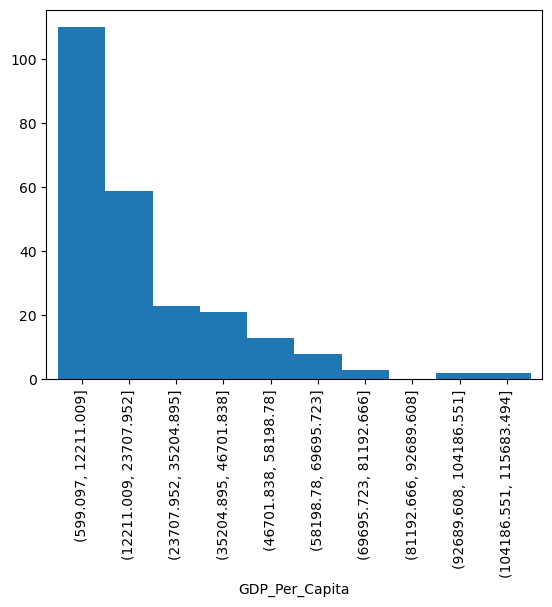

In [24]:
#rought work using "cut" method
pd.cut(gdp_2021['GDP_Per_Capita'], bins=10).value_counts(sort=False).plot(kind="bar", width=1);

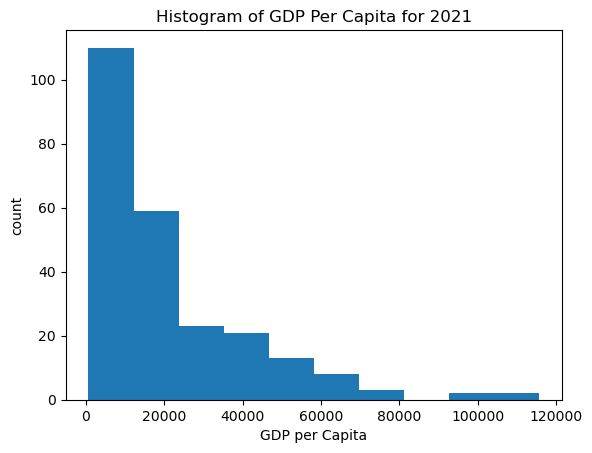

In [25]:
plt.hist(
    data=gdp_2021,
    x='GDP_Per_Capita',
    bins=10
);
plt.xlabel('GDP per Capita')                            
plt.ylabel('count')
plt.title('Histogram of GDP Per Capita for 2021');

BY looking at the distribution it is clear that it is 1) Unimodal 2) It is right skewed

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [26]:
gdp_2021.nlargest(5, columns=['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [27]:
gdp_2021.nsmallest(5, columns=['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [28]:
#select data for 1990 and 2021
gdp_df[gdp_df['Year'].isin([1990,2021])]

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
52,Africa Eastern and Southern,1990,3037.297466
54,Africa Western and Central,2021,4014.607965
85,Africa Western and Central,1990,2788.301039
...,...,...,...
7595,World,1990,9705.981267
7597,Zambia,2021,3236.788981
7628,Zambia,1990,2290.039226
7630,Zimbabwe,2021,2115.144555


In [29]:
gdp_pivoted = gdp_df[gdp_df['Year'].isin([1990,2021])].pivot_table(values= 'GDP_Per_Capita', index = 'Country', columns = 'Year')

In [30]:
#drop all the rows who has either 1990 or 2021 value as NAN. The aixs = 0 applies for row.
gdp_pivoted = gdp_pivoted.dropna(axis = 0)

In [31]:
gdp_pivoted

Year,1990,2021
Country,,
Africa Eastern and Southern,3037.297466,3519.174840
Africa Western and Central,2788.301039,4014.607965
Albania,4827.027705,14595.944386
Algeria,8828.874473,11029.138782
Angola,5793.084512,5911.835657
...,...,...
Vanuatu,2774.138350,2800.493866
Viet Nam,2099.394649,10628.219166
World,9705.981267,17055.357429



14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [32]:
gdp_pivoted['Percent_Change'] = 100 * ((gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990])

In [33]:
gdp_pivoted

Year,1990,2021,Percent_Change
Country,,,
Africa Eastern and Southern,3037.297466,3519.174840,15.865334
Africa Western and Central,2788.301039,4014.607965,43.980435
Albania,4827.027705,14595.944386,202.379544
Algeria,8828.874473,11029.138782,24.921232
Angola,5793.084512,5911.835657,2.049878
...,...,...,...
Vanuatu,2774.138350,2800.493866,0.950043
Viet Nam,2099.394649,10628.219166,406.251608
World,9705.981267,17055.357429,75.720074


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [34]:
#total 19 countries 
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].count()

Year
1990              19
2021              19
Percent_Change    19
dtype: int64

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2022. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

Which country had the highest % change in GDP per capita? 

In [35]:
#highest %change
gdp_pivoted.nlargest(2, columns=['Percent_Change'])

Year,1990,2021,Percent_Change
Country,,,
Equatorial Guinea,936.419751,14637.007350,1463.081870
China,1423.896348,17657.495181,1140.082904


Create a line plot showing this country's GDP per capita for all years from 1990 to 2022

In [36]:
Equ_Guinea = gdp_df[gdp_df['Country'] == 'Equatorial Guinea']

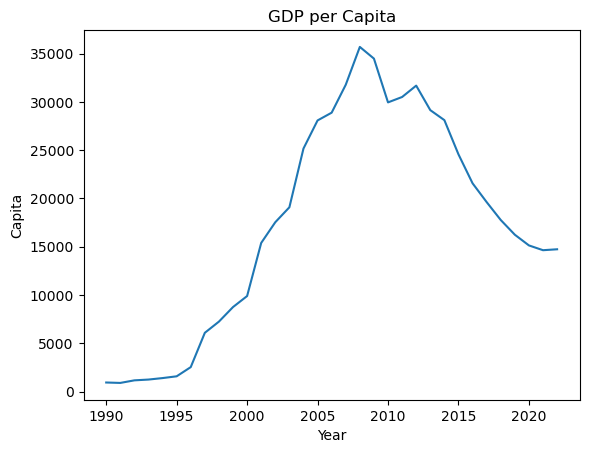

In [37]:
plt.plot(Equ_Guinea['Year'], Equ_Guinea['GDP_Per_Capita'])
plt.xlabel('Year')
plt.ylabel('Capita')
plt.title('GDP per Capita')
plt.show()


Create another showing the country with the second highest % change in GDP.

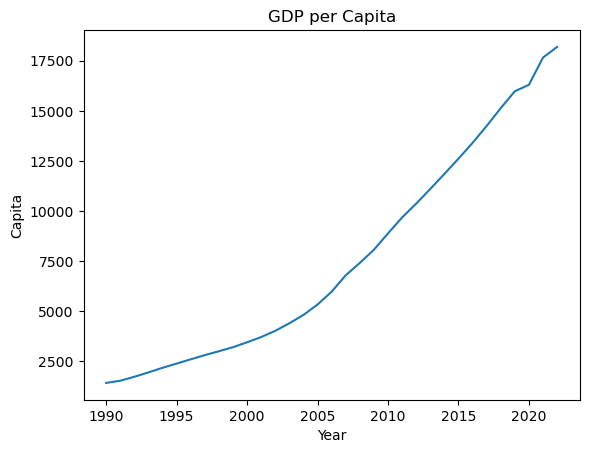

In [38]:
china_df = gdp_df[gdp_df['Country'] == 'China']
plt.plot(china_df['Year'], china_df['GDP_Per_Capita'])
plt.xlabel('Year')
plt.ylabel('Capita')
plt.title('GDP per Capita')
plt.show()

How do the trends in these countries compare?

The country "Equatorial Guinea" has more upper trends from 1995 towards 2005 where as China has consistent (kinda curve) raise in GDP capita. but post 2005 until 2020, "Equatorial Guinea" shows down and has downward trend where as China continued growing. The intial years until 2005 makes "Equatorial Guinea" to be highted percent in GDP Cpaita change as it raised up very sharply.

**Bonus:** Put both line charts on the same plot.

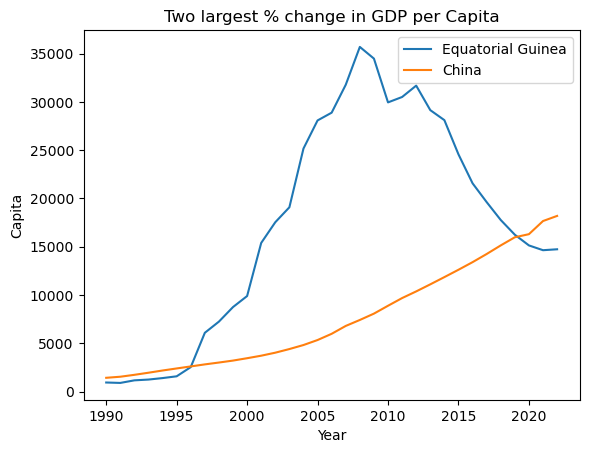

In [39]:
plt.plot(Equ_Guinea['Year'], Equ_Guinea['GDP_Per_Capita'], label='Equatorial Guinea')
plt.plot(china_df['Year'], china_df['GDP_Per_Capita'], label='China')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Capita')
plt.title('Two largest % change in GDP per Capita')
plt.show()

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [40]:
continents = pd.read_csv('../data/continents.csv')

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [41]:
#Since we only to match on the country from both data frames, we do not need to mention the join conditions. It will match
#on the country and will not merge rows where coutries not present in continents.

gdp_df = gdp_df.merge(continents)

In [42]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5888,Zimbabwe,1994,2670.106615,Africa
5889,Zimbabwe,1993,2458.783255,Africa
5890,Zimbabwe,1992,2468.278257,Africa
5891,Zimbabwe,1991,2781.787843,Africa


19. Determine the number of countries per continent. Create a bar chart showing this.

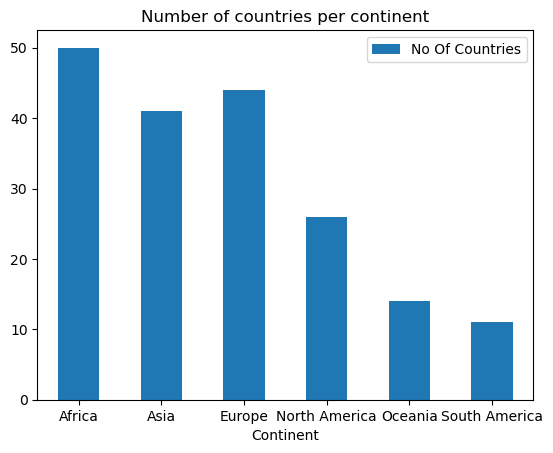

In [43]:
unique_cont_country = gdp_df.drop_duplicates(subset = ['Continent','Country']).groupby('Continent').size().reset_index(name='No Of Countries')
unique_cont_country = unique_cont_country.set_index('Continent')
unique_cont_country.plot(kind ='bar')
plt.xticks(rotation=0)
plt.title('Number of countries per continent');

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

<Axes: xlabel='GDP_Per_Capita', ylabel='Continent'>

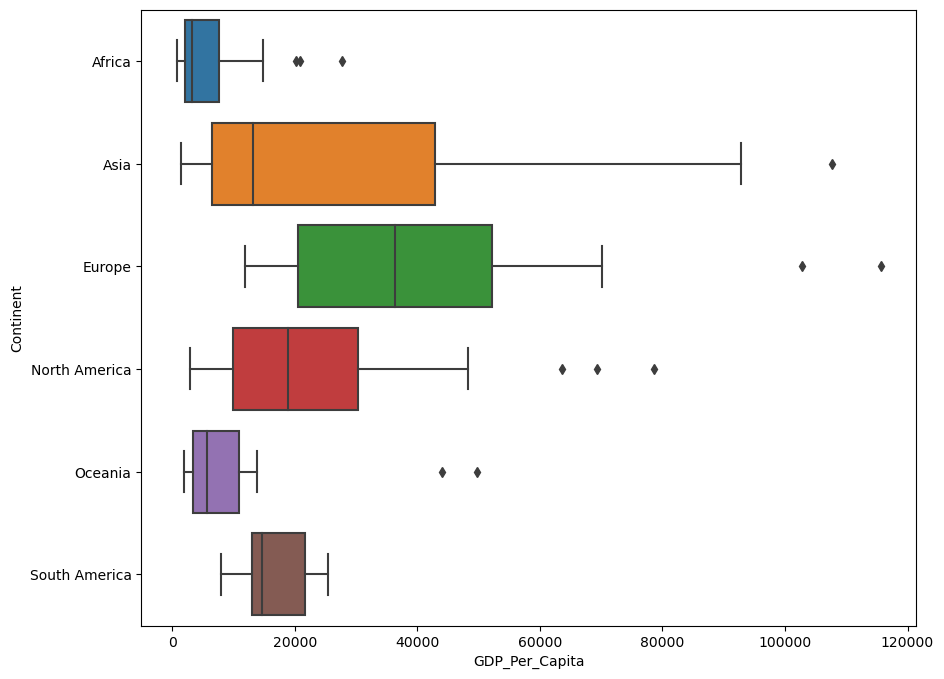

In [44]:
data = gdp_df[gdp_df['Year'] == 2021].sort_values('Continent')
plt.figure(figsize = (10,8))
sns.boxplot(data = data , x = "GDP_Per_Capita", y = "Continent")

Observations from box plot :
1) African continent having most countries there, has very less GDP per capita. There are few outliers in that continent.
2) Oceania and South America continents have less GDP. We can see couple outliers for Oceania continent.
3) China , North America, and Europe have few outlier coutries whose GDP per capita is way more than compared to their respective other countries.
4)Most of the boxes are right skewed from distribution stand point.

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**

In [45]:
#Based on the Pandas documentaation - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html , Skip the first 4 
#infoormational rows so that we can read data
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv',skiprows=4)

In [46]:
life_expectancy.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [47]:
#drop column. Documentation - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop
life_expectancy = life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

In [48]:
#Pandas documentation -> https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-melt
life_expectancy = life_expectancy.melt(id_vars='Country Name')


In [49]:
life_expectancy

,Country Name,variable,value
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17285,Kosovo,Unnamed: 68,NaN
17286,"Yemen, Rep.",Unnamed: 68,NaN
17287,South Africa,Unnamed: 68,NaN
17288,Zambia,Unnamed: 68,NaN


In [50]:
life_expectancy = life_expectancy.rename(columns={"Country Name": "Country", "variable": "Year", "value": "Life_Expectancy"})

In [51]:
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17285,Kosovo,Unnamed: 68,NaN
17286,"Yemen, Rep.",Unnamed: 68,NaN
17287,South Africa,Unnamed: 68,NaN
17288,Zambia,Unnamed: 68,NaN


23. What was the first country with a life expectancy to exceed 80?

In [59]:
life_expectancy[life_expectancy['Life_Expectancy'] > 80].sort_values(by=['Year']).head(3)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195


Ans : Japan was the first country to exceed life expectancy of 80.